In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Add dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read CSV files to DFs
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [31]:
# Inspect city data
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [32]:
# Get city data columns and rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [33]:
# Confirm no city data columns and rows are null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [34]:
# Get data types of each column in city data
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [35]:
# Get unique values of city type
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [36]:
# Get number of data points for urban cities
sum(city_data_df["type"]=="Urban")

66

In [37]:
# Get number of data points for suburban cities
sum(city_data_df["type"]=="Suburban")

36

In [38]:
# Get number of data points for rural cities
sum(city_data_df["type"]=="Rural")

18

In [39]:
# Get number of data points for each city type -- using value_counts()
city_data_df["type"].value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [40]:
# Inspect ride data
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [41]:
# Get ride data columns and rows that are not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [42]:
# Confirm no city data columns and rows are null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [43]:
# Get data types of each column in ride data
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [45]:
# Merge city and ride DFs into single DF
pyber_data_df = pd.merge(ride_data_df, city_data_df, on = ["city", "city"], how = "left")

# Display DF
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [50]:
# Create 3 separate DFs by city type
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [53]:
# Get number of rides for urban cities
urban_ride_count = urban_cities_df.groupby("city")["ride_id"].count()
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [54]:
# Get number of rides for suburban cities
suburban_ride_count = suburban_cities_df.groupby("city")["ride_id"].count()
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [55]:
# Get number of rides for rural cities
rural_ride_count = rural_cities_df.groupby("city")["ride_id"].count()
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [56]:
# Get average fare for urban cities
urban_avg_fare = urban_cities_df.groupby("city")["fare"].mean()
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [57]:
# Get average fare for suburban cities
suburban_avg_fare = suburban_cities_df.groupby("city")["fare"].mean()
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [58]:
# Get average fare for rural cities
rural_avg_fare = rural_cities_df.groupby("city")["fare"].mean()
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [59]:
# Get average number of drivers for urban cities
urban_avg_drivers = urban_cities_df.groupby("city")["driver_count"].mean()
urban_avg_drivers.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [60]:
# Get average number of drivers for suburban cities
suburban_avg_drivers = suburban_cities_df.groupby("city")["driver_count"].mean()
suburban_avg_drivers.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [61]:
# Get average number of drivers for rural cities
rural_avg_drivers = rural_cities_df.groupby("city")["driver_count"].mean()
rural_avg_drivers.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

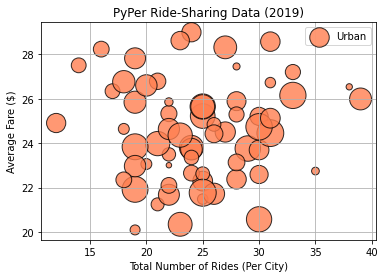

In [66]:
# Create scatter plot for urban cities
plt.scatter(
    urban_ride_count, 
    urban_avg_fare, 
    s = urban_avg_drivers * 10, 
    c = "coral", 
    ec = "black", 
    linewidths = 1, 
    alpha = 0.8, 
    label = "Urban")
plt.title("PyPer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add legend
plt.legend()

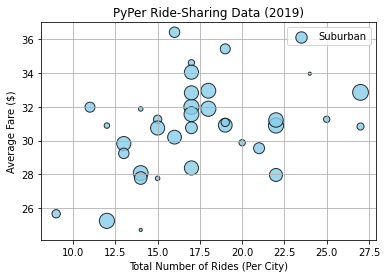

In [67]:
# Create scatter plot for suburban cities
plt.scatter(
    suburban_ride_count, 
    suburban_avg_fare, 
    s = suburban_avg_drivers * 10, 
    c = "skyblue", 
    ec = "black", 
    linewidths = 1, 
    alpha = 0.8, 
    label = "Suburban")
plt.title("PyPer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add legend
plt.legend()

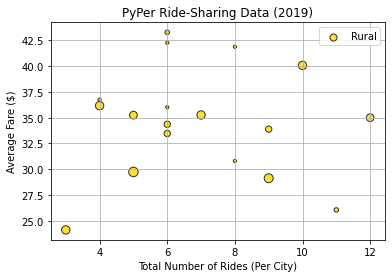

In [68]:
# Create scatter plot for rural cities
plt.scatter(
    rural_ride_count, 
    rural_avg_fare, 
    s = rural_avg_drivers * 10, 
    c = "gold", 
    ec = "black", 
    linewidths = 1, 
    alpha = 0.8, 
    label = "Rural")
plt.title("PyPer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add legend
plt.legend()

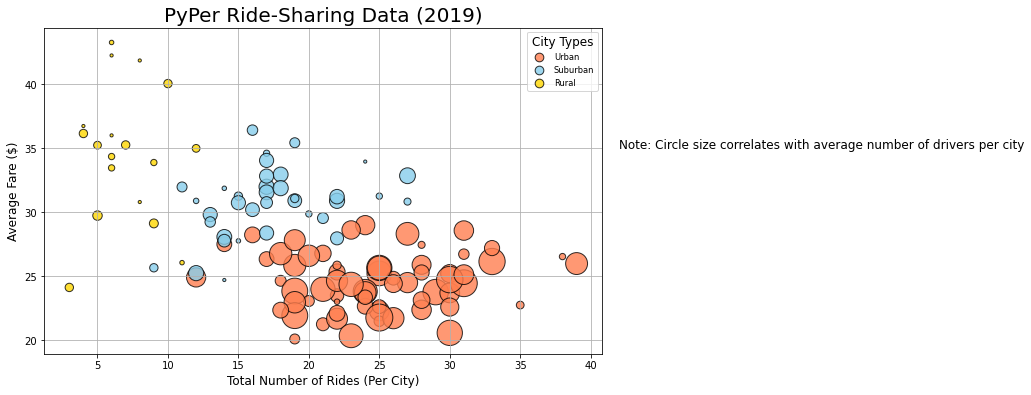

In [80]:
## FORMATTING FOR SAVING STILL ISN'T WORKING WELL
# Combine 3 scatter plots in 1
plt.subplots(figsize = (10,6))
plt.scatter(
    urban_ride_count, 
    urban_avg_fare, 
    s = urban_avg_drivers * 10, 
    c = "coral", 
    ec = "black", 
    linewidths = 1, 
    alpha = 0.8, 
    label = "Urban")

plt.scatter(
    suburban_ride_count, 
    suburban_avg_fare, 
    s = suburban_avg_drivers * 10, 
    c = "skyblue", 
    ec = "black", 
    linewidths = 1, 
    alpha = 0.8, 
    label = "Suburban")

plt.scatter(
    rural_ride_count, 
    rural_avg_fare, 
    s = rural_avg_drivers * 10, 
    c = "gold", 
    ec = "black", 
    linewidths = 1, 
    alpha = 0.8, 
    label = "Rural")

# Incorporate other graph formatting
# plt.tight_layout()
plt.title("PyPer Ride-Sharing Data (2019)", fontsize = 20)
plt.ylabel("Average Fare ($)", fontsize = 12)
plt.xlabel("Total Number of Rides (Per City)", fontsize = 12)
plt.grid(True)

# Add legend
lgnd = plt.legend(fontsize = "small", mode = "Expanded", scatterpoints = 1, loc = "best", title = "City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Add test label about circle size
plt.text(42, 35, "Note: Circle size correlates with average number of drivers per city", fontsize = "12", wrap = True)

# Save figure
plt.savefig("Analysis/Fig1.png")

# Show plot
plt.show()